### Read and set the data into list and dict, easier to manipulate

In [1]:
import pandas as pd
inputFileName = "Data_Knapsack.xlsx"
param_data = pd.read_excel(inputFileName, "Param", skiprows=0)
data = pd.read_excel(inputFileName, "Instance", skiprows=0)

nbItems = param_data['Value'][0]  #10000

weights = data['Weight']
values = data['Value']
totalWeight = sum(weights[iItem] for iItem in range(nbItems))


### Create your linear program

In [25]:
from pulp import *

lambdaTab = []
elapsedTime = []
objective = []


nbIteration = 100
for iIteration in range(nbIteration): #iteration to compute the results for different capacity values
    iLambda = (iIteration+1)/(2.0*float(nbIteration+1))
    capacity = int(iLambda*totalWeight)
    print("Run iteration", iIteration, " with lambda=%.2f"%(iLambda))
    
    #Create the Linear Problem
    prob = LpProblem("Knapsack", LpMaximize)
    
    #Add variables
    #selectVar = dict()
    #for iItem in range(nbItems):
    #    selectVar[iItem] = LpVariable(str(iItem) ,  cat='Boolean')
    #print(selectVar)
        
    vars=LpVariable.dicts("vars", (iItem for iItem in range(nbItems)), cat='Binary') 
    print(vars)
    
    #Objective
    prob += lpSum([vars[iItem]*values[iItem] for iItem in range(nbItems)])
    
    #Capacity cst
    prob += lpSum([vars[iItem]*weights[iItem] for iItem in range(nbItems)])<=iLambda*lpSum([weights[iItem] for iItem in range(nbItems)])

    #Write LP file and solve with default solver
    prob.writeLP("knapsackProblem.lp", writeSOS=1, mip=1)
    prob.solve()
    
    lambdaTab.append(100.0*iLambda)
    elapsedTime.append(100*prob.solutionTime)
    objective.append(value(prob.objective))
    
    print("Results with lambda=%.2f --> %.2f in %.2f time unit"%(lambdaTab[iIteration], objective[iIteration], elapsedTime[iIteration]))
    #varsDict = {}
    #for v in prob.variables():
    #    varsDict[v.name] = v.varValue
    #    if v.varValue != 0.0 : print(v.name, "=", v.varValue)
    


Run iteration 0  with lambda=0.00
{0: vars_0, 1: vars_1, 2: vars_2, 3: vars_3, 4: vars_4, 5: vars_5, 6: vars_6, 7: vars_7, 8: vars_8, 9: vars_9, 10: vars_10, 11: vars_11, 12: vars_12, 13: vars_13, 14: vars_14, 15: vars_15, 16: vars_16, 17: vars_17, 18: vars_18, 19: vars_19, 20: vars_20, 21: vars_21, 22: vars_22, 23: vars_23, 24: vars_24, 25: vars_25, 26: vars_26, 27: vars_27, 28: vars_28, 29: vars_29, 30: vars_30, 31: vars_31, 32: vars_32, 33: vars_33, 34: vars_34, 35: vars_35, 36: vars_36, 37: vars_37, 38: vars_38, 39: vars_39, 40: vars_40, 41: vars_41, 42: vars_42, 43: vars_43, 44: vars_44, 45: vars_45, 46: vars_46, 47: vars_47, 48: vars_48, 49: vars_49, 50: vars_50, 51: vars_51, 52: vars_52, 53: vars_53, 54: vars_54, 55: vars_55, 56: vars_56, 57: vars_57, 58: vars_58, 59: vars_59, 60: vars_60, 61: vars_61, 62: vars_62, 63: vars_63, 64: vars_64, 65: vars_65, 66: vars_66, 67: vars_67, 68: vars_68, 69: vars_69, 70: vars_70, 71: vars_71, 72: vars_72, 73: vars_73, 74: vars_74, 75: vars_7

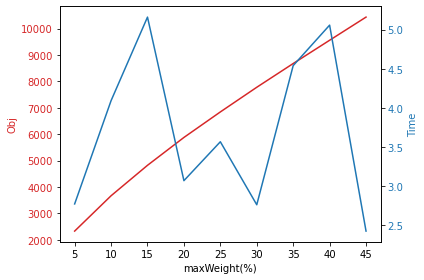

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('maxWeight(%)')
ax1.set_ylabel('Obj', color=color)
ax1.plot(lambdaTab, objective, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax2.plot(lambdaTab, elapsedTime, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()